### Bank marketing Data - Kaggle

Objective is to predict whether client will subscribe to a term deposit

Here is a brief description of each column in the dataset:

**age**: Age of the client.

**job**: Type of job (e.g., admin, technician, services, etc.).

**marital**: Marital status (e.g., married, single, divorced).

**education**: Level of education (e.g., basic, high school, university degree).

**default**: Whether the client has credit in default (yes, no).

**housing**: Whether the client has a housing loan (yes, no).

**loan**: Whether the client has a personal loan (yes, no).

**contact**: Contact communication type (e.g., cellular, telephone).

**month**: Last contact month of the year.

**day_of_week**: Last contact day of the week.

**duration**: Last contact duration in seconds (important feature, but should be discarded if the intention is to predict outcomes as it is known after the call).

**campaign**: Number of contacts performed during this campaign and for this client.
pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means the client was not previously contacted).
previous: Number of contacts performed before this campaign and for this client.
poutcome: Outcome of the previous marketing campaign (e.g., success, failure, nonexistent).

**emp.var.rate**: Employment variation rate - quarterly indicator.

**cons.price.idx**: Consumer price index - monthly indicator.

**cons.conf.idx**: Consumer confidence index - monthly indicator.

**euribor3m**: Euribor 3-month rate - daily indicator.

**nr.employed**: Number of employees - quarterly indicator.

**y**: The target variable, indicating whether the client has subscribed to a term deposit (yes, no).

In [2]:
# prompt: import numpy pandas and read bank additionalfull csv as data

import numpy as np
import pandas as pd
data = pd.read_csv('bank-additional-full.csv', sep=';')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data[(data.age > data.age.quantile(0.05)) & (data.age < data.age.quantile(0.95))]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
data[(data.age > data.age.quantile(0.05)) | (data.age < data.age.quantile(0.95))]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
data['z_score'] = (data.age - data.age.mean()) / data.age.std() # Assign z-scores to a new column using square brackets
data[['z_score']]

,z_score
0,1.533016
1,1.628973
2,-0.290182
3,-0.002309
4,1.533016
...,...
41183,3.164298
41184,0.573438
41185,1.533016
41186,0.381522


In [11]:
data[(data.z_score > 3) | (data.z_score < -3)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,z_score
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no,3.452171
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no,3.164298
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no,4.603665
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,4.603665
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,4.603665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no,4.219833
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes,3.931960
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes,3.836002
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,3.164298


In [14]:
x = data.drop(columns=['y', 'z_score'])
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


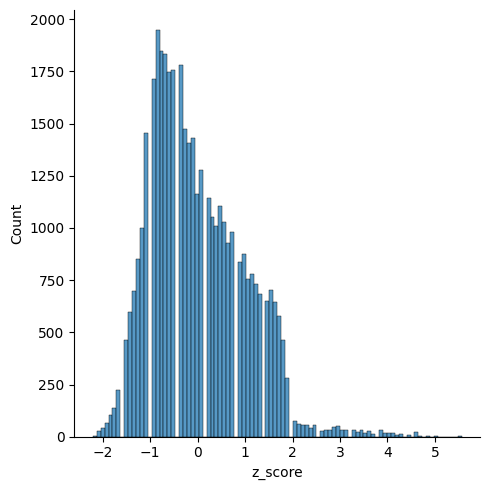

In [15]:
# prompt: generate a distributuin plot for z score

import seaborn as sns
sns.displot(data['z_score'])


In [16]:
y = data['y']
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [17]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### now lets split the data and train the model

In [27]:
# prompt: import train test split and initialise it

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test


In [22]:
num_cols = [1,2,3,8,9]
ord_cols = [4,5,6,7,14]
iter_cols= [0,10,11,12,13,15,16]
simp_cols=[17,18,19]
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import set_config
chart = make_column_transformer((OneHotEncoder(),num_cols),(OrdinalEncoder(),ord_cols),(IterativeImputer(),iter_cols),(SimpleImputer(),simp_cols))
set_config(display='diagram')
chart

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 [1, 2, 3, 8, 9]),
                                ('ordinalencoder', OrdinalEncoder(),
                                 [4, 5, 6, 7, 14]),
                                ('iterativeimputer', IterativeImputer(),
                                 [0, 10, 11, 12, 13, 15, 16]),
                                ('simpleimputer', SimpleImputer(),
                                 [17, 18, 19])])

In [23]:
# prompt: make knn pipeline

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5000)
pipe = make_pipeline(chart, KNeighborsClassifier())
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  [1, 2, 3, 8, 9]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [4, 5, 6, 7, 14]),
                                                 ('iterativeimputer',
                                                  IterativeImputer(),
                                                  [0, 10, 11, 12, 13, 15, 16]),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  [17, 18, 19])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [28]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  [1, 2, 3, 8, 9]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [4, 5, 6, 7, 14]),
                                                 ('iterativeimputer',
                                                  IterativeImputer(),
                                                  [0, 10, 11, 12, 13, 15, 16]),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  [17, 18, 19])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [29]:
pred = pipe.predict(X_test)
pred

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [30]:
# prompt: give me the accuracy score

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)


0.9017965525613013

so theres a 90% chance client will subscribe